In [ ]:
#How to find out a regiression problem?
#if dependent variable is continuous variable in numerical form than categorical variable
#examples - categorical data (months of year)
#continuous data - temperature measured for a city

#how to find out a classification problem?
#if dependent variable is not continuous variable and can be in categorical form having discrete values

In [ ]:
#statistical process of estimating relation between predictiors(independent) and output variables(dependent)

In [ ]:
#types of regression
#1.linear regression
#2.logistic regression
#3.ridge regression
#4.lasso regression
#5.polynomial regression
#6.bayesian linear regression

In [ ]:
#regression types are based on type of data existing

In [ ]:
#linear regression
#data that is linearly related
#there is linear relationship between independent and dependent variable
#it can be single independent variable against dependent variable
#it can be multiple independent variables against dependent variable
#single variable and output variable -> simple linear regression
#more than one independent variable against dependent variable -> multilinear regression

#the predictor/features/independent variables are in linear realtion with dependent variable(outcome)
#if one independent variable is present thatn it is simple linear regression

#y = a0 + a1.x1 + E
#y-> outcome/dependent variable
# a0 and a1 -> regression coefficients
#x1-> independent variable/predictor/feature
#E-> error between predicted and original value

#if number of independent variables are more than one then its multiple linear regression 
#y = a0 + a1.x1 + ... + an.xn + E

#we try to understand what are the values of coefficients of regression a0 and a1 that will reduce the errors between original values and predicted values

#vertical mapping or error is the distance from the predicted value to the original value on the curve in a graph


In [ ]:
#polynomial regression
#independent variable will have some degress 
#where data cannot be fitted in linear fashion so it has nonlinear charcateristics
#fit data into polynomial features and predict output

In [ ]:
#if data is linear
#there is something like multicollinearity
#if independent variables are correlated with each other then there is redundancy
#if they are highly correlation their individal impact is not important on output and lose significance as single independent variable because they are related with other independent variables
#so they will produce same results so there is redundancy
#example - using getdummies to convert categorical values to numerical values 

In [ ]:
#go for some penality or compensation
#through ridge reggression and lasso reggression


In [ ]:
#ridge regression
#follows L2 regularization
#considers penalty
#it has a regularization method considering penalty term to reduce coefficients of regressions
#significance with independent variables - avoid multicollinearly problem

In [ ]:
#lasso regression
#least absolute squares selection operation
#L1 regularization 
#apply for multicollinearity problem
#L1 reduces the coefficients related to particular independent variable and bring to zero value
#if coefficient value is 0 then variable is not important at all, it can be eliminated
#try to reduce the complexity of the model and bring it to simple form

In [ ]:
#logistic regression
#classificiation algorithm
#output as probablities of different classes
#not regression algorithm

In [ ]:
#bayesian linear regression
#rather calculating a single value estimate from our regression algorithm
#we can calculate the dsitribution of outcomes

In [ ]:
#evalutaion methods
#mean absolute error
#mean squared error
#R2 score

In [ ]:
#mean absolute error
#best value is 0
#summation of absolute value distance from the points to the line we get mean absolute error
#difference between actual value and predicted value and then the average of the difference

In [ ]:
#mean squared error
#best value is 0
#square of differences between actual and predicted values and then the average of that

In [ ]:
#R2 scores how much variability in dependent variable can be explained by the model
#correlation coefficient R 
#best value is 1, worst value is 0 or negative

In [ ]:
#Residual plot
#understand how well the mdoel is performing
#difference between actual output and predicted output is plotted against predicted values

In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
or_data = pd.read_csv("car data.csv")

In [3]:
or_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
or_data.info()
#categorical variables have dtype as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#different categories in categorical values use value_counts
print(or_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [8]:
print(or_data['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [9]:
print(or_data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [5]:
or_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
or_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#find correlation of different features of the dataset with its label 
#find correlation with variables to dependent variables
#selling price is dependent variable
or_data.corr()['Selling_Price']
#only compares with integer values

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

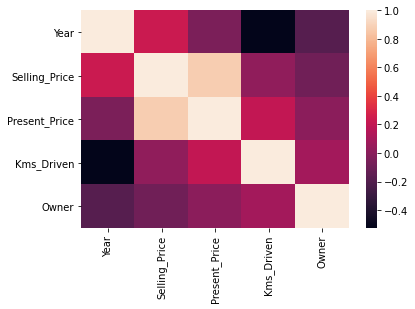

In [12]:
#create heatmap
import seaborn as sns
cor = or_data.corr()
sns.heatmap(cor)
#is multicollinearity present or not??
#present price has high correlation with selling price
#find whether independent variables are correlated with each other or not

In [ ]:
#find whether independent variables are linearly related to dependent variables
#cant do on entire dataset - so create validation datasets to try out regressionalgorithms


In [14]:
#Data Preprocessing and Preparation
#swap column year with age
or_data['Age'] = 2021 - or_data['Year']
or_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
#drop column year
or_data.drop('Year',axis=1,inplace=True)
#inplace - True allows to make changes in the oriiginal dataframe itself

In [16]:
or_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
#carname not signifying anything
or_data.drop('Car_Name',axis=1,inplace=True)
or_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [19]:
#convert categorical variables to numerical form
or_data = pd.get_dummies(data = or_data,drop_first=True)
or_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [20]:
X = or_data.drop('Selling_Price',axis = 1)
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [21]:
Y = or_data[['Selling_Price']]
Y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [22]:
#divide the dataset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [23]:
print("X train:", X_train.shape)

X train: (240, 8)


In [24]:
print("Y train:", Y_train.shape)

Y train: (240, 1)


In [25]:
print("X test:", X_test.shape)

X test: (61, 8)


In [26]:
print("Y test:", Y_test.shape)

Y test: (61, 1)


In [27]:
lm = linear_model.LinearRegression()

In [28]:
lm.fit(X_train,Y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lm.predict(X_test)

In [31]:
print("MAE:",mean_absolute_error(Y_test,y_pred))

MAE: 1.0998575552990952


In [32]:
print("MSE:",mean_squared_error(Y_test,y_pred))

MSE: 2.982384861859748


In [33]:
print("R2score:",r2_score(Y_test,y_pred))
#good value
#best value is 1

R2score: 0.8625260513315253


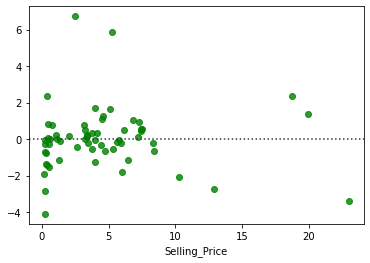

In [34]:
#plot residual plots
sns.residplot(x=Y_test,y=y_pred,color="g")
#if there is error in this plot then it shows we are not applying correct type of algorithm 
#residual is the difference between actual output and predicted output

#points are the data
#most of the data is around 0 (on line) then that is correct prediction
#if they are above midline then there is error and these values are predicted with low value
#if the difference is postive between actual and predicted value then the value is predicted as a lower value than actual value
# that is why residual is positive and the points are above midline

#if negative value for residual then you got a high value of predicted value than the actual value
#the points are below midline


#as majority of data is in midline so that is good
#we have applied our linear regressor on right dataset
#if this is not the case then it is non linear regressor 
#also it cannot make any predictions then that means we are applying regressor on wrong kind of data


In [35]:
print("score:", lm.score(X_test,Y_test))

#training and test scores - does not make sense because same data is fitted
#score gives same value as validiation test comparison

#this is 86% correct

#R2 score tells how well model is talking about variabilitiy of your dependent variable
#how it can show variation in dependent variable and talks about ACCURACY only
#calculated through correlation
#correlation factor

#score 
#how well you will be able predict your values 
#using value of x train and y train 
#how it can be understood for x test and y test

#score and r2 score are calculated differently but give same results

score: 0.8625260513315253


In [36]:
residuals = Y_test - y_pred

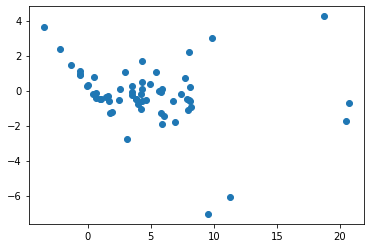

In [37]:
plt.scatter(y_pred,residuals)
#same representation as residual plot function